In [1]:
file=open("raw_file.txt","r")

In [2]:
print(file.readlines())

['15/10/2023, 14:51\n', 'Brazil - Argentina\n', '2:1(0:0)\n', '15/10/2023, 14:48\n', 'France - England\n', '3:1(1:0)\n', '15/10/2023, 14:45\n', 'Germany - Netherlands\n', '3:0(1:0)\n', '15/10/2023, 14:42\n', 'Armenia - Italy\n', '1:3(0:1)\n', '15/10/2023, 14:39\n', 'Argentina - Germany\n', '2:1(0:0)\n', '15/10/2023, 14:36\n', 'Brazil - England\n', '1:0(0:0)\n', '15/10/2023, 14:33\n', 'Netherlands - Belgium\n', '0:3(0:0)\n', '15/10/2023, 14:30\n', 'Spain - France\n', '1:1(1:0)\n', '15/10/2023, 14:27\n', 'Belgium - Argentina\n', '1:2(1:0)\n', '15/10/2023, 14:24\n', 'Spain - England\n', '0:2(0:1)\n', '15/10/2023, 14:21\n', 'France - Italy\n', '0:0(0:0)\n', '15/10/2023, 14:18\n', 'Armenia - Netherlands\n', '2:2(1:2)\n', '15/10/2023, 14:15\n', 'Germany - Brazil\n', '0:2(0:2)\n', '15/10/2023, 14:12\n', 'Germany - Argentina\n', '2:1(1:1)\n', '15/10/2023, 14:09\n', 'Brazil - Netherlands\n', '2:0(0:0)\n', '15/10/2023, 14:06\n', 'Belgium - Armenia\n', '2:1(1:0)\n', '15/10/2023, 14:03\n', 'France

In [6]:
file = open("raw_file.txt","r")

x = 0
new_line = ""

for line in file:
    if x == 3:
        print(new_line.replace('\n', ''))
        x = 0
        new_line = ""    

    x = x + 1
    new_line = new_line + line + ";"

    #print(line)

15/10/2023, 14:51;Brazil - Argentina;2:1(0:0);
15/10/2023, 14:48;France - England;3:1(1:0);
15/10/2023, 14:45;Germany - Netherlands;3:0(1:0);
15/10/2023, 14:42;Armenia - Italy;1:3(0:1);
15/10/2023, 14:39;Argentina - Germany;2:1(0:0);
15/10/2023, 14:36;Brazil - England;1:0(0:0);
15/10/2023, 14:33;Netherlands - Belgium;0:3(0:0);
15/10/2023, 14:30;Spain - France;1:1(1:0);
15/10/2023, 14:27;Belgium - Argentina;1:2(1:0);
15/10/2023, 14:24;Spain - England;0:2(0:1);
15/10/2023, 14:21;France - Italy;0:0(0:0);
15/10/2023, 14:18;Armenia - Netherlands;2:2(1:2);
15/10/2023, 14:15;Germany - Brazil;0:2(0:2);
15/10/2023, 14:12;Germany - Argentina;2:1(1:1);
15/10/2023, 14:09;Brazil - Netherlands;2:0(0:0);
15/10/2023, 14:06;Belgium - Armenia;2:1(1:0);
15/10/2023, 14:03;France - Netherlands;3:1(0:1);
15/10/2023, 14:00;Argentina - Italy;1:1(1:1);
15/10/2023, 13:57;Armenia - Germany;0:0(0:0);
15/10/2023, 13:54;Spain - England;2:1(1:1);
15/10/2023, 13:51;Brazil - Belgium;0:0(0:0);
15/10/2023, 13:48;Germany

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [138]:
df = pd.read_csv("PlayPix_raw_file.csv", sep=";")

In [139]:
df.head()

,Date,Game,Result,Unnamed: 3
0,"15/10/2023, 14:51",Brazil - Argentina,2:1(0:0),NaN
1,"15/10/2023, 14:48",France - England,3:1(1:0),NaN
2,"15/10/2023, 14:45",Germany - Netherlands,3:0(1:0),NaN
3,"15/10/2023, 14:42",Armenia - Italy,1:3(0:1),NaN
4,"15/10/2023, 14:39",Argentina - Germany,2:1(0:0),NaN


In [140]:
dates = df["Date"].str.split(pat = ',', expand = True)

df[["Date", "Time"]] = dates

teams = df["Game"].str.split(pat = '-', expand = True)

df[["Home", "Away"]] = teams

results = df["Result"].str.split(pat = '(', expand = True)

df[["FT", "HT"]] = results

df["HT"] = df["HT"].str.replace(")", "")

resultsFT = df["FT"].str.split(pat = ':', expand = True)

df[["HomeFT", "AwayFT"]] = resultsFT

resultsHT = df["HT"].str.split(pat = ':', expand = True)

df[["HomeHT", "AwayHT"]] = resultsHT


In [141]:
df = df.drop("Game", axis=1)
df = df.drop("Result", axis=1)

df = df.drop(df.columns[[1]], axis=1)

In [142]:
df["Total Gols"] = df["HomeFT"].astype(int) + df["AwayFT"].astype(int)

df['Over25'] = df['Total Gols'].astype(int).apply(lambda x: 'Sim' if x>=3 else 'Não')

df['Ambos'] = np.where((df['HomeFT'].astype(int) > 0) & (df['AwayFT'].astype(int) > 0), 'Sim', 'Não')

In [143]:
df.head()

,Date,Time,Home,Away,FT,HT,HomeFT,AwayFT,HomeHT,AwayHT,Total Gols,Over25,Ambos
0,15/10/2023,14:51,Brazil,Argentina,2:1,0:0,2,1,0,0,3,Sim,Sim
1,15/10/2023,14:48,France,England,3:1,1:0,3,1,1,0,4,Sim,Sim
2,15/10/2023,14:45,Germany,Netherlands,3:0,1:0,3,0,1,0,3,Sim,Não
3,15/10/2023,14:42,Armenia,Italy,1:3,0:1,1,3,0,1,4,Sim,Sim
4,15/10/2023,14:39,Argentina,Germany,2:1,0:0,2,1,0,0,3,Sim,Sim


<Axes: xlabel='count', ylabel='Over25'>

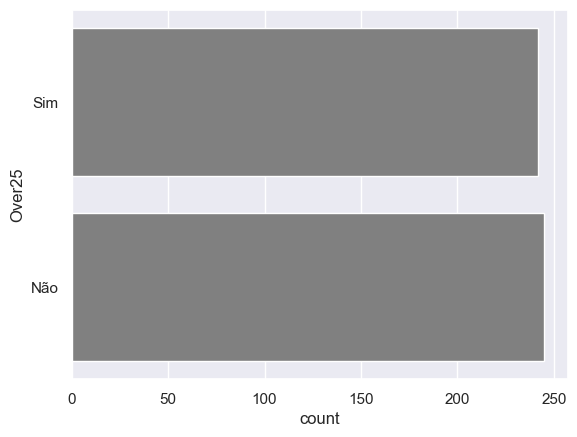

In [144]:
sns.countplot(df['Over25'], color='gray')

<Axes: xlabel='count', ylabel='Ambos'>

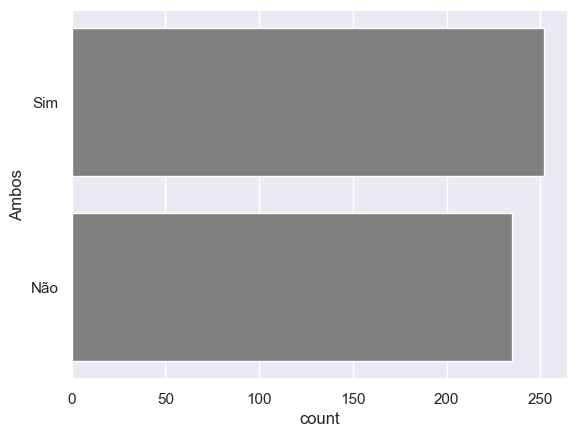

In [145]:
sns.countplot(df['Ambos'], color='gray')

In [157]:
x = 0

for index, row in df.iterrows():
    valor_atual = row['Over25']
    if valor_atual == 'Sim':
        x = 0
    else:
        x = x + 1
    
    print(row['Total Gols'], valor_atual, x)

3 Sim 0
4 Sim 0
3 Sim 0
4 Sim 0
3 Sim 0
1 Não 1
3 Sim 0
2 Não 1
3 Sim 0
2 Não 1
0 Não 2
4 Sim 0
2 Não 1
3 Sim 0
2 Não 1
3 Sim 0
4 Sim 0
2 Não 1
0 Não 2
3 Sim 0
0 Não 1
3 Sim 0
4 Sim 0
2 Não 1
2 Não 2
4 Sim 0
2 Não 1
2 Não 2
2 Não 3
2 Não 4
1 Não 5
1 Não 6
2 Não 7
3 Sim 0
4 Sim 0
3 Sim 0
0 Não 1
1 Não 2
4 Sim 0
4 Sim 0
3 Sim 0
1 Não 1
3 Sim 0
4 Sim 0
4 Sim 0
1 Não 1
2 Não 2
2 Não 3
3 Sim 0
4 Sim 0
4 Sim 0
2 Não 1
4 Sim 0
2 Não 1
4 Sim 0
3 Sim 0
3 Sim 0
2 Não 1
1 Não 2
3 Sim 0
4 Sim 0
1 Não 1
4 Sim 0
1 Não 1
3 Sim 0
0 Não 1
2 Não 2
1 Não 3
2 Não 4
2 Não 5
2 Não 6
2 Não 7
3 Sim 0
2 Não 1
1 Não 2
0 Não 3
4 Sim 0
1 Não 1
2 Não 2
3 Sim 0
3 Sim 0
4 Sim 0
3 Sim 0
2 Não 1
0 Não 2
3 Sim 0
3 Sim 0
1 Não 1
3 Sim 0
3 Sim 0
4 Sim 0
1 Não 1
4 Sim 0
4 Sim 0
4 Sim 0
4 Sim 0
4 Sim 0
3 Sim 0
1 Não 1
1 Não 2
2 Não 3
3 Sim 0
4 Sim 0
4 Sim 0
1 Não 1
2 Não 2
3 Sim 0
2 Não 1
1 Não 2
4 Sim 0
1 Não 1
4 Sim 0
4 Sim 0
4 Sim 0
2 Não 1
3 Sim 0
2 Não 1
4 Sim 0
2 Não 1
2 Não 2
2 Não 3
3 Sim 0
3 Sim 0
4 Sim 0
4 Sim 0


In [158]:
x = 0

for index, row in df.iterrows():
    valor_atual = row['Ambos']
    if valor_atual == 'Sim':
        x = 0
    else:
        x = x + 1
    
    print(row['Total Gols'], valor_atual, x)

3 Sim 0
4 Sim 0
3 Não 1
4 Sim 0
3 Sim 0
1 Não 1
3 Não 2
2 Sim 0
3 Sim 0
2 Não 1
0 Não 2
4 Sim 0
2 Não 1
3 Sim 0
2 Não 1
3 Sim 0
4 Sim 0
2 Sim 0
0 Não 1
3 Sim 0
0 Não 1
3 Não 2
4 Sim 0
2 Não 1
2 Não 2
4 Sim 0
2 Não 1
2 Sim 0
2 Sim 0
2 Sim 0
1 Não 1
1 Não 2
2 Sim 0
3 Sim 0
4 Sim 0
3 Sim 0
0 Não 1
1 Não 2
4 Sim 0
4 Sim 0
3 Sim 0
1 Não 1
3 Sim 0
4 Sim 0
4 Sim 0
1 Não 1
2 Não 2
2 Sim 0
3 Sim 0
4 Sim 0
4 Sim 0
2 Não 1
4 Sim 0
2 Não 1
4 Não 2
3 Não 3
3 Sim 0
2 Não 1
1 Não 2
3 Sim 0
4 Sim 0
1 Não 1
4 Sim 0
1 Não 1
3 Sim 0
0 Não 1
2 Sim 0
1 Não 1
2 Não 2
2 Não 3
2 Não 4
2 Sim 0
3 Sim 0
2 Não 1
1 Não 2
0 Não 3
4 Sim 0
1 Não 1
2 Não 2
3 Sim 0
3 Sim 0
4 Sim 0
3 Sim 0
2 Sim 0
0 Não 1
3 Sim 0
3 Não 1
1 Não 2
3 Sim 0
3 Sim 0
4 Sim 0
1 Não 1
4 Sim 0
4 Sim 0
4 Sim 0
4 Sim 0
4 Não 1
3 Sim 0
1 Não 1
1 Não 2
2 Não 3
3 Não 4
4 Sim 0
4 Não 1
1 Não 2
2 Sim 0
3 Não 1
2 Sim 0
1 Não 1
4 Sim 0
1 Não 1
4 Sim 0
4 Sim 0
4 Sim 0
2 Não 1
3 Sim 0
2 Não 1
4 Sim 0
2 Sim 0
2 Sim 0
2 Não 1
3 Sim 0
3 Não 1
4 Sim 0
4 Sim 0
